In [21]:
import CleanText
from GeoLocator import *
import TAGS, progressbar, pickle, re, time, json

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from pprint import pprint
from pathlib import Path
from random import randint

from IPython.display import clear_output

import unicodedata as ud
import pandas as pd

In [22]:
def direct_geodata(tweet):
    if tweet.geo:
        lat = tweet.geo['coordinates'][0]
        lng = tweet.geo['coordinates'][1]
        return({'lat': lat, 'lng': lng, 'inferred': False, 'geolocator': None})
    elif tweet.user.location is not None:
        # first, search the written location for geodata:
        g = re.search("(-?\d{1,3}\.\d{1,10})(, ?-?\d{1,3}\.\d{1,10})?", tweet.user.location)
        if g is not None: 
            print(tweet.user.location, g.groups())
        else:
            pass
        '''
            location = Location(tweet.user.location)
            return(location.data)
            '''

In [7]:
tags = TAGS.document(path="../../datasets/tags-tsv/boylesque/TAGS - boylesque - Archive.tsv", suppress_warnings=True)
ids = tags.ids
tweets = TAGS.TweetSet(ids[0:28], suppress_warnings=True, progressbar=False)

In [43]:
# Sorting into buckets

buckets = {}
_round = 0
df = pd.DataFrame(columns=['Latitude', 'Longitude'])

for i, tweet in enumerate(tweets.tweets):
    # clear_output(wait=True)
    #print("\n")
    # print(f"{i}/{len(tweets.tweets)}")
    '''
    cleaner = CleanText.CleanText(text=tweet.user.location)
    cleaner.digits = False
    cleaner.clean()
    print(cleaner.text)
    '''

    if tweet.user.location is not None:
        g = re.search("(-?\d{1,3}\.\d{1,10})(, ?-?\d{1,3}\.\d{1,10})?", tweet.user.location)
        if g is not None: print(tweet.user.location, g.groups())
        geodata = direct_geodata(tweet)
        
        if not 'error' in geodata:
            df = df.append({'Latitude': float(geodata['lat']), 'Longitude': float(geodata['lng'])}, ignore_index=True)
        '''
            _str = f"{round(float(geodata['lat']), _round)}, {round(float(geodata['lng']), _round)}"
            if _str not in buckets: buckets[_str] = 0
            buckets[_str] += 1
        '''

#pprint(buckets)

In [44]:
df

,Latitude,Longitude
0,51.889690,0.899465
1,34.053691,-118.242767
2,39.748099,-104.995687
3,54.702354,-3.276575
4,18.435773,-69.969947
5,42.387597,-71.099497
6,55.859126,-4.246316
7,-37.814218,144.963161
8,41.894802,12.485338
9,40.712728,-74.006015


In [45]:
import pandas as pd
import numpy as np



step = 0.2
to_bin = lambda x: np.floor(x / step) * step
df["latbin"] = df.Latitude.map(to_bin)
df["lonbin"] = df.Longitude.map(to_bin)
groups = df.groupby(("latbin", "lonbin"))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  # Remove the CWD from sys.path while we load stuff.


In [47]:
df

,Latitude,Longitude,latbin,lonbin
0,51.889690,0.899465,51.8,0.8
1,34.053691,-118.242767,34.0,-118.4
2,39.748099,-104.995687,39.6,-105.0
3,54.702354,-3.276575,54.6,-3.4
4,18.435773,-69.969947,18.4,-70.0
5,42.387597,-71.099497,42.2,-71.2
6,55.859126,-4.246316,55.8,-4.4
7,-37.814218,144.963161,-38.0,144.8
8,41.894802,12.485338,41.8,12.4
9,40.712728,-74.006015,40.6,-74.2


In [24]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [25]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


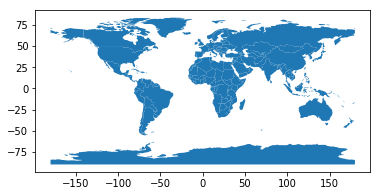

In [27]:
world.plot()

In [2]:
import GeoLocator

In [6]:
location = Location('37.585869, 122.367340')

Geolocator chosen: Nominatim.
Sleeping for 4 seconds...
Could not find geographic information for location 37 585869 122 367340


In [8]:
location._sense_lat_lng_from_name()

('37.585869', '122.367340')


In [1]:
import TAGS, ProcessTweets, CleanText

tags = TAGS.document(path="../../datasets/tags-tsv/boylesque/TAGS - boylesque - Archive.tsv", suppress_warnings=True)
ids = tags.ids
tweets = TAGS.TweetSet(ids[0:50], suppress_warnings=True, progressbar=False, include_retweets=False)

In [4]:
for t in tweets.tweets:
    p = ProcessTweets.AnalysisTools(t)
    
    '''
    potential_names = p.potential_names
    print(potential_names)
    '''
    
    inside = p.inside_country("US")
    if inside: print(t.user.location)

Los Angeles, CA
Denver, CO
Somerville, MA
New York
Saskatoon, Saskatchewan
Ottawa, Canada
Brooklyn, New York
Hollywood
Toronto
Los Angeles, CA
OC and LA 
Austin, Texas 


In [5]:
import json

In [60]:
def get_country_poly(country_code):
    from shapely.geometry import shape
    for c in ProcessTweets.COUNTRY_GEOJSON['features']:
        if country_code in c['properties']['ADMIN'].lower(): return(c['properties']['ADMIN'], shape(c['geometry']))

In [ ]:
poly = get_country_poly("united states of america")[1]

from shapely.geometry import Point

for t in tweets.tweets:
    p = ProcessTweets.AnalysisTools(t)
    if 'lat' in p.geo and 'lng' in p.geo:
        point = Point(p.geo['lat'], p.geo['lng'])
        print(p.tweet.user.location, poly.contains(point))
        print(poly.intersects(point))

-118.2427666